# End-to-End SVM Project

## Objective
This project aims to build a Support Vector Machine (SVM) model to detect fraudulent credit card transactions. Through this project, we will understand SVM's mathematical foundations, implementation, and practical application to solve a real business problem in the financial security domain.

## Business Problem
A financial institution wants to improve its fraud detection system to minimize financial losses while maintaining customer satisfaction. The challenges they face include:
1. Identifying fraudulent transactions quickly and accurately
2. Reducing false positives that inconvenience customers
3. Adapting to evolving fraud patterns
4. Managing the highly imbalanced nature of fraud data

By developing an effective fraud detection model, the institution can:
- Reduce financial losses from fraud
- Decrease operational costs of manual reviews
- Improve customer experience by minimizing false alerts
- Strengthen trust and reputation in the market

## What is Support Vector Machine (SVM)?
Support Vector Machine is a powerful supervised machine learning algorithm used for classification and regression tasks. SVM is particularly effective for complex, high-dimensional datasets and is widely used in applications ranging from text classification to image recognition.

### Mathematical Intuition
The core idea behind SVM is to find the optimal hyperplane that separates different classes with the maximum margin. For a binary classification problem:

1. **Linear SVM**: The algorithm seeks a hyperplane defined by:
   $w \cdot x - b = 0$
   
   Where:
   - $w$ is the normal vector to the hyperplane
   - $x$ is the input feature vector
   - $b$ is the bias term

   The goal is to maximize the margin between the two classes, which is $\frac{2}{||w||}$.

2. **Soft Margin SVM**: Allows for some misclassifications to handle non-linearly separable data:
   $minimize \frac{1}{2}||w||^2 + C\sum_{i=1}^{n} \xi_i$
   
   Subject to: $y_i(w \cdot x_i - b) \geq 1 - \xi_i$ and $\xi_i \geq 0$
   
   Where:
   - $C$ is the regularization parameter
   - $\xi_i$ are slack variables allowing for misclassifications

3. **Kernel SVM**: For non-linear decision boundaries, SVM uses the "kernel trick" to implicitly map data to a higher-dimensional space where it becomes linearly separable:
   $K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)$
   
   Common kernels include:
   - Linear: $K(x_i, x_j) = x_i \cdot x_j$
   - Polynomial: $K(x_i, x_j) = (x_i \cdot x_j + r)^d$
   - RBF (Gaussian): $K(x_i, x_j) = e^{-\gamma||x_i - x_j||^2}$

### Why Use SVM?
1. **Effective in high-dimensional spaces**: Performs well with complex datasets
2. **Versatility with kernels**: Can capture various decision boundaries
3. **Memory efficiency**: Only uses a subset of training points (support vectors)
4. **Robustness**: Less susceptible to overfitting in high-dimensional spaces
5. **Theoretical guarantees**: Solid mathematical foundation with good generalization properties

## Implementation

In [2]:
### Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, classification_report,
                           precision_recall_curve, roc_curve, roc_auc_score,
                           precision_score, recall_score, f1_score, accuracy_score)
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

Generating an linearly seperable dataset for a credit card transactions fraudulent and Non Fraudulent

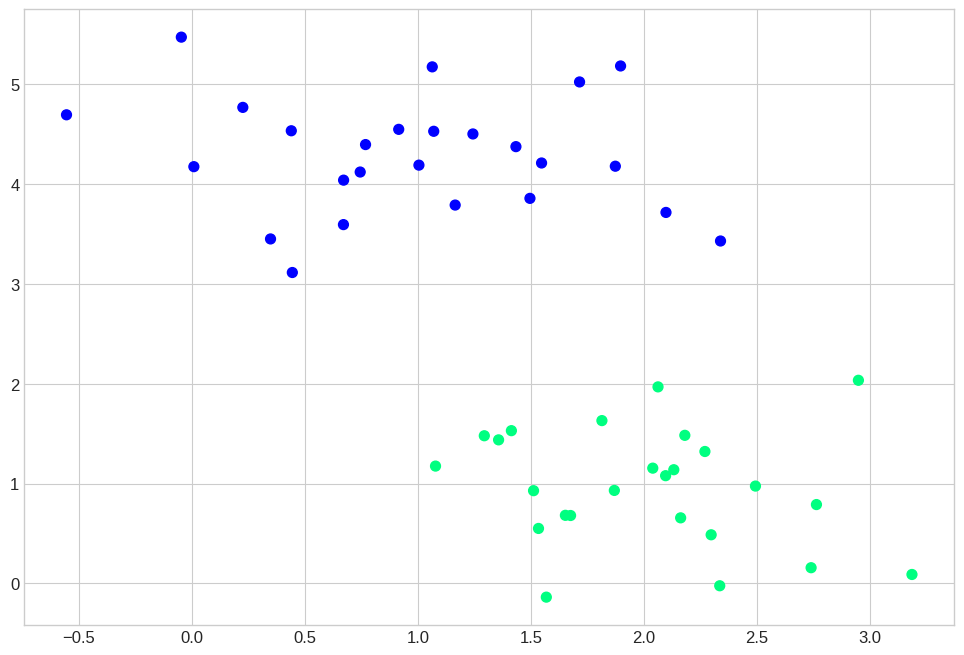

In [16]:
from sklearn.datasets import make_blobs # Import make_blobs from sklearn.datasets
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.show()

In [15]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [17]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

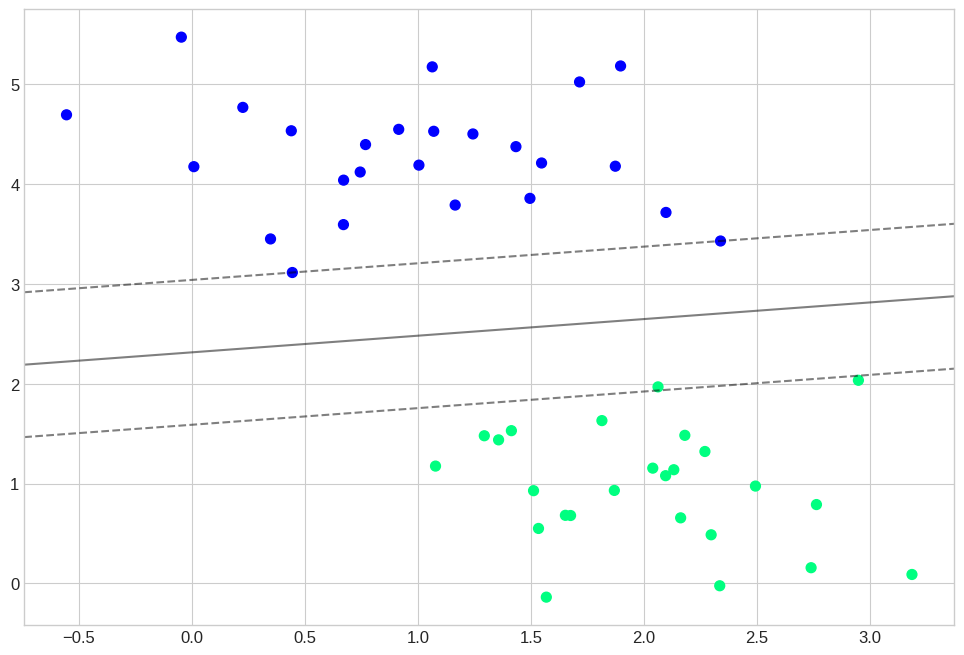

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

Increasing the no of samples

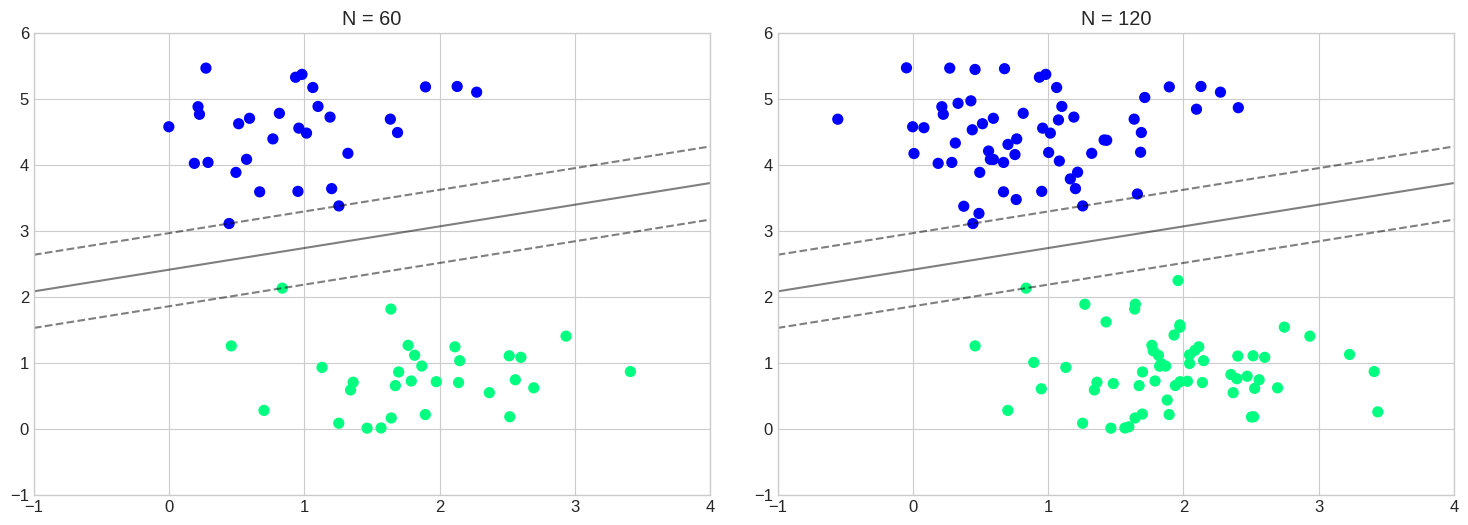

In [19]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Almost linearly seperable dataset

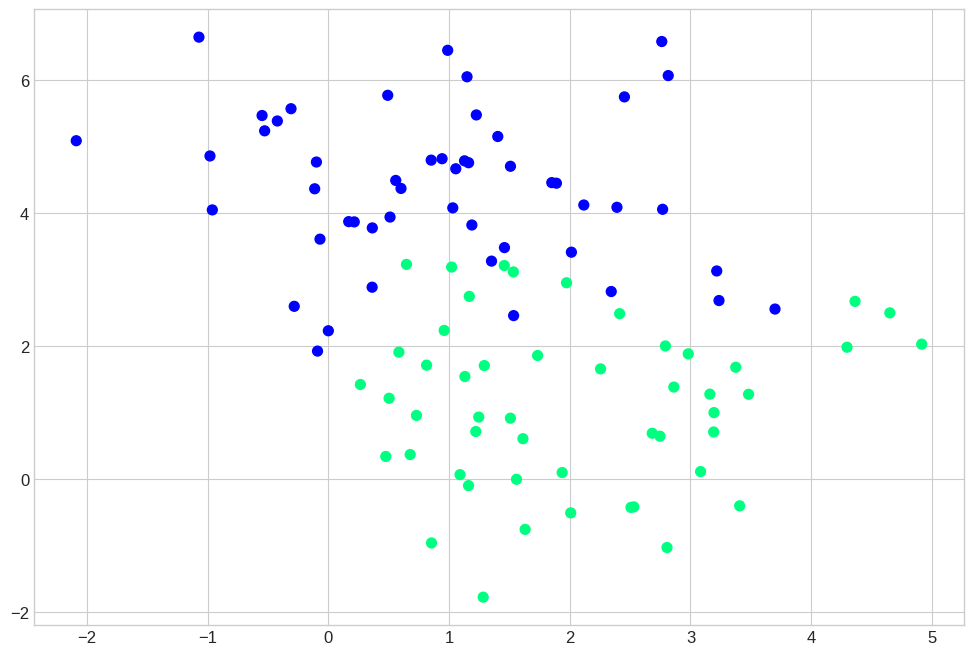

In [20]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

How different value of C impacts ?

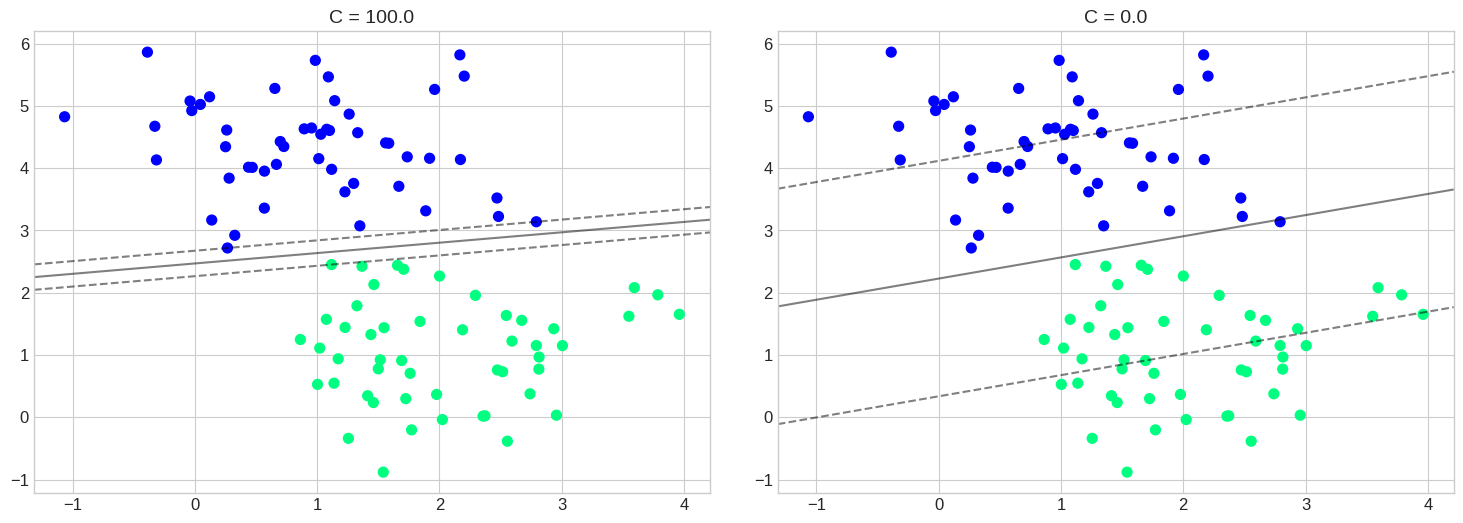

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

the parameter C is called the regularization parameter, and it plays a crucial role in controlling the trade-off between achieving a low error on the training data and maintaining a large margin (i.e., avoiding overfitting).

### In equation terms:

SVM solves an optimization problem like:

minimize (1/2) * ||w||² + C * Σ (hinge loss)

where:
- (1/2) * ||w||² encourages a large margin (small weights),
- C * Σ (hinge loss) penalizes misclassifications.

So, larger C emphasizes minimizing classification error, while smaller C emphasizes having a simpler model.


High C → Tight decision boundary, follows the training points closely.

Low C → Smoother, wider margin, decision boundary may ignore minor misclassifications.